# Iowa Analysis using Machine Learning Techniques

## Table of Contents
- Model Settings
- Linear Regression
- Logistic Regression
- Decision Tree
- Penalized Linear Regression
    - Visualizing Ridge
    - Visualizing Lasso
    - Visualizing Elastic Net
- RandomForest

### Model Settings

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# Numerical and Catagorical Data
r_df = pd.read_csv('output_df_train_V2.csv')
r_mo = pd.read_csv('output_df_test.csv')

# Numerical (Catagorical data dummified)
df = pd.read_csv('output_df2_train.csv')
mo = pd.read_csv('output_df2_test.csv')

In [14]:
# Columns must match. Use this to confirm

df1 = df.copy()
df1 = df1.drop(['SalePrice'], axis = 1)

mo1 = mo.copy()
#mo1 = mo1.drop(['MSZoning_Other'], axis= 1)

print('train columns', df1.shape[1])
print('test columns\n', mo1.shape[1])
print('Column number and name of train.csv')

for i in range( df1.columns.shape[0]):
#for i in range( df1.columns.shape[0]-1,0,-1 ):
    if df1.columns[i] in mo1.columns:
        print(i,'{}: matches'.format(df1.columns[i]) )
    else:
        print(i,'{}: train csv'.format(df1.columns[i]) ,df1.columns[i], 'not found in test csv')
        mo1 = mo1.drop([mo1.columns[i] ], axis = 1)
        print('{} dropped'.format(df1.columns[i]) )

print('train columns', df1.shape[1])
print('test columns', mo1.shape[1])

train columns 79
test columns 79
Column number and name of train.csv
0 Id: matches
1 MSSubClass: matches
2 LotFrontage: matches
3 LotArea: matches
4 OverallQual: matches
5 MasVnrArea: matches
6 BsmtFinSF1: matches
7 TotalBsmtSF: matches
8 X1stFlrSF: matches
9 X2ndFlrSF: matches
10 GrLivArea: matches
11 FullBath: matches
12 BedroomAbvGr: matches
13 TotRmsAbvGrd: matches
14 GarageYrBlt: matches
15 GarageCars: matches
16 GarageArea: matches
17 SoldAfterBuilt: matches
18 TotalBath: matches
19 FrontAreaSF: matches
20 MSZoning_FV: matches
21 MSZoning_RH: matches
22 MSZoning_RL: matches
23 LotShape_IR2: matches
24 LotShape_Reg: matches
25 LandContour_HLS: matches
26 LandContour_Low: matches
27 LandContour_Lvl: matches
28 Neighborhood_B: matches
29 Neighborhood_C: matches
30 Neighborhood_D: matches
31 Neighborhood_E: matches
32 Neighborhood_F: matches
33 BldgType_B: matches
34 BldgType_C: matches
35 HouseStyle_B: matches
36 HouseStyle_C: matches
37 Exterior1st_B: matches
38 Exterior1st_C: matc

In [15]:
# Settings for train X and Y
drop = ['Id','SalePrice']

x = df.drop(drop,axis =1)
y = df.SalePrice

In [25]:
# Settings for test.csv X 
testX = mo.drop(['Id'], axis = 1)

In [17]:
print(x.shape)
print(testX.shape)

(1450, 78)
(1459, 78)


In [18]:
# split the train data (total observation) to test/train by 30/70 
nrow = x.shape[0]
third_nrow = int(nrow *.3)

np.random.seed(1)
testIdx = np.random.choice(range(nrow), size=third_nrow, replace=False)
trainIdx = list(set(range(nrow))-set(testIdx))

trainX1 = x.iloc[trainIdx]
trainY1 = y.iloc[trainIdx]

testX1 = x.iloc[testIdx]
testY1 = y.iloc[testIdx]

In [19]:
# Another method to split data
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [59]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Linear regression Analysis
lm.coef_
lm.intercept_
print (lm.score(X_test, Y_test) )#R2

0.9040489926609141


In [74]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
Answer = lm.predict(testX)
lm_submission = pd.DataFrame( {'Id' : mo.Id, 'SalePrice': Answer})
lm_submission.head()

,Id,SalePrice
0,1461,121481.972573
1,1462,171429.283921
2,1463,179517.643939
3,1464,193112.630899
4,1465,211238.220150


In [111]:
Answer

array([121481.97257313, 171429.28392088, 179517.643939  , ...,
       169499.68439714, 117077.22469567, 220044.22478513])

In [ ]:
submission.to_csv('submission.csv', index = False)

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log = LogisticRegression()

In [65]:
log.fit(x,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log.coef_
log.intercept_
log.score(x,y)

0.8945205479452055

In [112]:
Answer = log.predict(testX)
log_submission = pd.DataFrame( {'Id' : mo.Id, 'SalePrice': Answer })
log_submission.head()

,Id,SalePrice
0,1461,147000
1,1462,157900
2,1463,185000
3,1464,162000
4,1465,189000


In [113]:
Answer

array([147000, 157900, 185000, ..., 178400,  93500, 171000])

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree = DecisionTreeClassifier()

In [71]:
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
tree.feature_importances_[:5]

array([0.02073525, 0.04197112, 0.04475957, 0.02481098, 0.02810896])

In [9]:
tree.score(x,y)

1.0

In [77]:
Answer = tree.predict(testX)
Dtree_submission = pd.DataFrame( {'Id' : mo.Id, 'SalePrice': Answer })
Dtree_submission.head()

,Id,SalePrice
0,1461,147000
1,1462,207500
2,1463,180000
3,1464,200500
4,1465,189000


### Penalized Linear Regression

This is used to add weight to the RSS (model), by minimizing beta

In [78]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [79]:
ridge = Ridge()
lasso = Lasso()
net = ElasticNet()

#### Visualizing Ridge

In [80]:
ridge.set_params(alpha = 1.0)
ridge.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
ridge.score(x,y)

0.9109059873189717

In [82]:
coef =[]
intercept =[]
R2 = []
lambda_range = np.linspace(1e-3,200,20)
for lambda_ in lambda_range:
    ridge.set_params(alpha = lambda_)
    ridge.fit(x,y)
    intercept.append(ridge.intercept_)
    coef.append(ridge.coef_)
    R2.append(ridge.score(x,y))

Text(0.5, 1.0, "Model's Intercept with increasing weight")

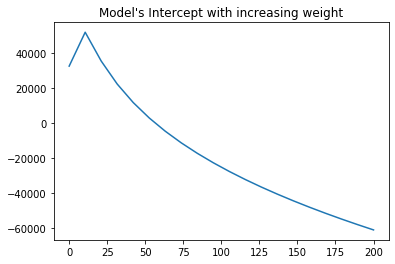

In [83]:
plt.plot(lambda_range, intercept)
plt.title("Model's Intercept with increasing weight")

Text(0.5, 1.0, 'Change of Ridge slopes varying alpha')

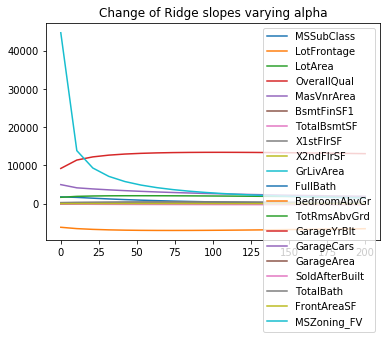

In [84]:
coefs = pd.DataFrame(np.array(coef), columns = x.columns)

for name in coefs.columns[:20]:
    plt.plot(lambda_range, coefs[name], label = name)
plt.legend(loc =1)
plt.title("Change of Ridge slopes varying alpha")

Text(0.5, 1.0, 'Change of $R^2$ varying alpha')

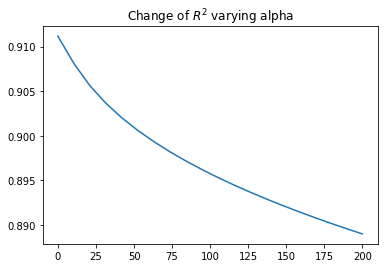

In [85]:
plt.plot(lambda_range, R2)
plt.title("Change of $R^2$ varying alpha")

In [88]:
train_R2=[]
test_R2=[]

lambda_range = np.linspace(1e-3,200,20)
for lambda_ in lambda_range:
    ridge.set_params(alpha = lambda_, normalize = False)
    ridge.fit(X_train, Y_train)
    train_R2.append(ridge.score(X_train, Y_train))
    test_R2.append(ridge.score(X_test, Y_test))

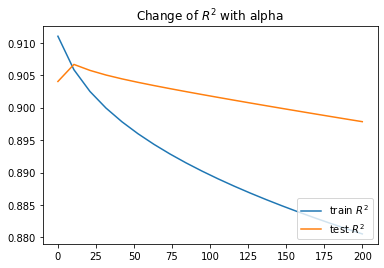

In [89]:
plt.plot(lambda_range, train_R2, label = 'train $R^2$')
plt.plot(lambda_range, test_R2, label = 'test $R^2$')
plt.title("Change of $R^2$ with alpha ")
plt.legend(loc = 4)

In [90]:
ridge.set_params(alpha = 25) # alpha set to where the train and test R2 meet
ridge.fit(x, y)
coefDF = pd.Series(ridge.coef_ , index = x.columns)
print('The intercept is %.4f'%(ridge.intercept_) )
print('Slopes are %s'%(coefDF))

The intercept is 30287.2907
Slopes are MSSubClass            -80.543282
LotFrontage           -20.895000
LotArea                 1.021619
OverallQual         12457.136281
MasVnrArea             26.045797
                        ...     
GarageFinish_RFn    -4083.277235
GarageFinish_Unf    -1373.844440
PavedDrive_Paved     4253.904994
X2ndFlrYN_Yes       -5431.998529
HalfBathYN_Yes       4339.931315
Length: 78, dtype: float64


### Visualizing Lasso
Lasso function here is very usualful because betas with multicollinearity will be reduced by minimization

In [91]:
lasso.set_params(alpha =1, normalize = True)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [92]:
lasso.fit(x,y)
print('Lasso score is %.4f'%(lasso.score(x,y)) )
print('Intercept is %.4f'%(lasso.intercept_) )
lasso_coef = pd.Series(lasso.coef_ , index = x.columns)
print('Slopes: \n%s'%(lasso_coef))

Lasso score is 0.9108
Intercept is 30854.2396
Slopes: 
MSSubClass             2.355442
LotFrontage          -40.439089
LotArea                1.028907
OverallQual         9622.530822
MasVnrArea            19.069043
                       ...     
GarageFinish_RFn   -3634.835701
GarageFinish_Unf   -1017.312656
PavedDrive_Paved    5100.985649
X2ndFlrYN_Yes      -8481.774051
HalfBathYN_Yes      4864.807808
Length: 78, dtype: float64


In [93]:
coef = []
intercept = []
R2 = []

lambda_range = np.linspace(1e-3, 250, 20)
for lambda_ in lambda_range:
    lasso.set_params(alpha = lambda_ , normalize = True)
    lasso.fit(x,y)
    intercept.append(lasso.intercept_)
    coef.append(lasso.coef_)
    R2.append(lasso.score(x,y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142208400.7615967, tolerance: 848984689.3744539
  positive)


Text(0.5, 1.0, 'Change of Lasso intercept with alpha')

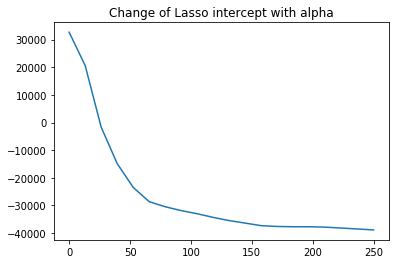

In [94]:
plt.plot(lambda_range, intercept)
plt.title('Change of Lasso intercept with alpha')

Text(0.5, 1.0, 'Change of Lasso Slopes with alpha')

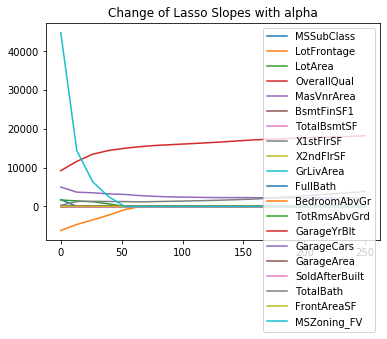

In [95]:
coefs = pd.DataFrame(np.array(coef), columns = x.columns)

for name in coefs.columns[:20]:
    plt.plot(lambda_range, coefs[name], label = name)
plt.legend(loc =1)
plt.title('Change of Lasso Slopes with alpha')

In [96]:
train_R2=[]
test_R2=[]

lambda_range = np.linspace(1e-3,200,20)
for lambda_ in lambda_range:
    lasso.set_params(alpha = lambda_ , normalize = False)
    lasso.fit(X_train, Y_train)
    train_R2.append(lasso.score(X_train, Y_train))
    test_R2.append(lasso.score(X_test, Y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262446462780.5586, tolerance: 590048344.3401589
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44352461002.27057, tolerance: 590048344.3401589
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1398508644.041626, tolerance: 590048344.3401589
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

Text(0.5, 1.0, '$R^2$ with alpha')

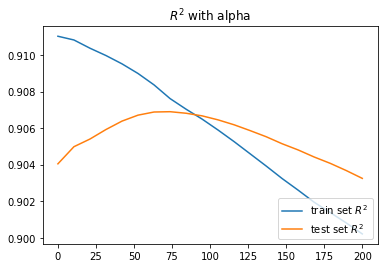

In [97]:
plt.plot(lambda_range, train_R2, label=r'train set $R^2$')
plt.plot(lambda_range, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)
plt.title('$R^2$ with alpha')

In [103]:
lasso.set_params(alpha = 0.00013, normalize = True)
lasso.fit(x,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56022017682.04169, tolerance: 848984689.3744539
  positive)


Lasso(alpha=0.00013, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
lasso_answer = lasso.predict(testX)
lasso_df = pd.DataFrame( data = lasso_answer, columns = ['SalePrice'])
lasso_submission = pd.concat( [mo.Id, lasso_df], axis = 1 )
lasso_submission.head(5)

,Id,SalePrice
0,1461,121481.789318
1,1462,171429.299451
2,1463,179517.583290
3,1464,193112.579038
4,1465,211238.206533


In [105]:
lasso_answer

array([121481.78931766, 171429.29945126, 179517.5832897 , ...,
       169499.72794255, 117077.338132  , 220044.15950633])

### Visualizing ElasticNet

In [111]:
lambda_size = 40
rho_size = 30
lambda_range = np.linspace(1e-2, 200, lambda_size)
rho_range = np.linspace(0.01, 1, rho_size)

trainR2 = np.zeros( (lambda_size, rho_size) )
testR2 = np.zeros( (lambda_size, rho_size) )
intercepts = np.zeros( (lambda_size, rho_size) )
coefs = np.zeros( (lambda_size, rho_size) )

In [112]:
net.set_params(normalize = True)

for lambda_i, lambda_ in enumerate(lambda_range):
    for rho_i, rho in enumerate(rho_range):
        net.set_params(alpha =lambda_ , l1_ratio = rho)
        net.fit(trainX, trainY)
        trainR2[lambda_i, rho_i] = net.score(trainX , trainY)
        testR2[lambda_i, rho_i] = net.score(testX, testY)
        intercepts[lambda_i, rho_i] = net.intercept_
        coefs = net.coef_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36393876449.79083, tolerance: 608125896.8479782
  positive)


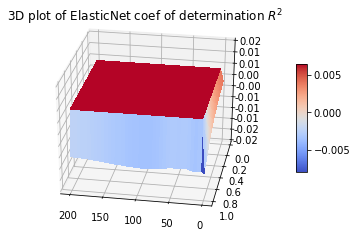

In [113]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data

x = lambda_range
y = rho_range
X, Y = np.meshgrid(x, y)
Z = (trainR2-testR2).T
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(np.min(Z) - 0.01, np.max(Z) + 0.01)
ax.view_init(30, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title(r'3D plot of ElasticNet coef of determination $R^2$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

# XGBoost

In [137]:
from xgboost import XGBClassifier

In [139]:
xgb = XGBClassifier()

In [140]:
xgb.fit(x,y) #Trained using dummified data

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
xg_answer = xgb.predict(testX)

In [141]:
xg_df = pd.DataFrame( data = xg_answer, columns = ['SalePrice'])
xg_submission = pd.concat( [mo.Id, xg_df], axis = 1 )
xg_submission.head()

,Id,SalePrice
0,1461,129000
1,1462,157900
2,1463,173000
3,1464,181000
4,1465,212000


In [144]:
drop = ['Id','SalePrice']
#Cleaned training
x = r_df.drop(drop,axis =1)
y = r_df.SalePrice
#Cleaned test
testX = r_mo.drop(['Id'], axis = 1)